# Car Price Prediction

Dataset source: https://archive.ics.uci.edu/ml/datasets/Automobile

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_log_error



In [ ]:
df=pd.read_csv('https://drive.google.com/uc?id=1UOUron79AUpb8HR7OF7cGATmJeAygrH-')

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. This process is called **symboling**. A value of  +3  indicates that the auto is risky,  −3  that it is probably pretty safe.

In [ ]:
df['CarName'].head(25)

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
20         chevrolet vega 2300
21               dodge rampage
22         dodge challenger se
23                  dodge d200
24           dodge monaco (sw)
Name: CarName, dtype: object

In [ ]:
cars_name= pd.Series([i.split()[0] for i in df['CarName']])
cars_name

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Length: 205, dtype: object

In [ ]:
df['CarCompany']=cars_name
df.drop(columns= ['car_ID','CarName'],inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
df['CarCompany'].value_counts()

CarCompany
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
mercury         1
porcshce        1
Nissan          1
toyouta         1
vokswagen       1
Name: count, dtype: int64

In [ ]:
df.loc[(df['CarCompany'] == "vw") | (df['CarCompany'] == "vokswagen"), 'CarCompany'] = 'volkswagen'

# porsche
df.loc[(df['CarCompany']=='porcshce'),'CarCompany'] = "porsche"
# toyota
df.loc[(df['CarCompany']=='toyouta'),'CarCompany'] = "toyota"
# nissan
df.loc[(df['CarCompany']=='Nissan'),'CarCompany'] = "nissan"
# mazda
df.loc[(df['CarCompany']=='maxda'),'CarCompany'] = "mazda"

df['CarCompany'].value_counts()

CarCompany
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: count, dtype: int64

In [ ]:
df.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
CarCompany           object
dtype: object

In [ ]:
num_df= df.select_dtypes(include=['int','float'])
num_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Axes: >

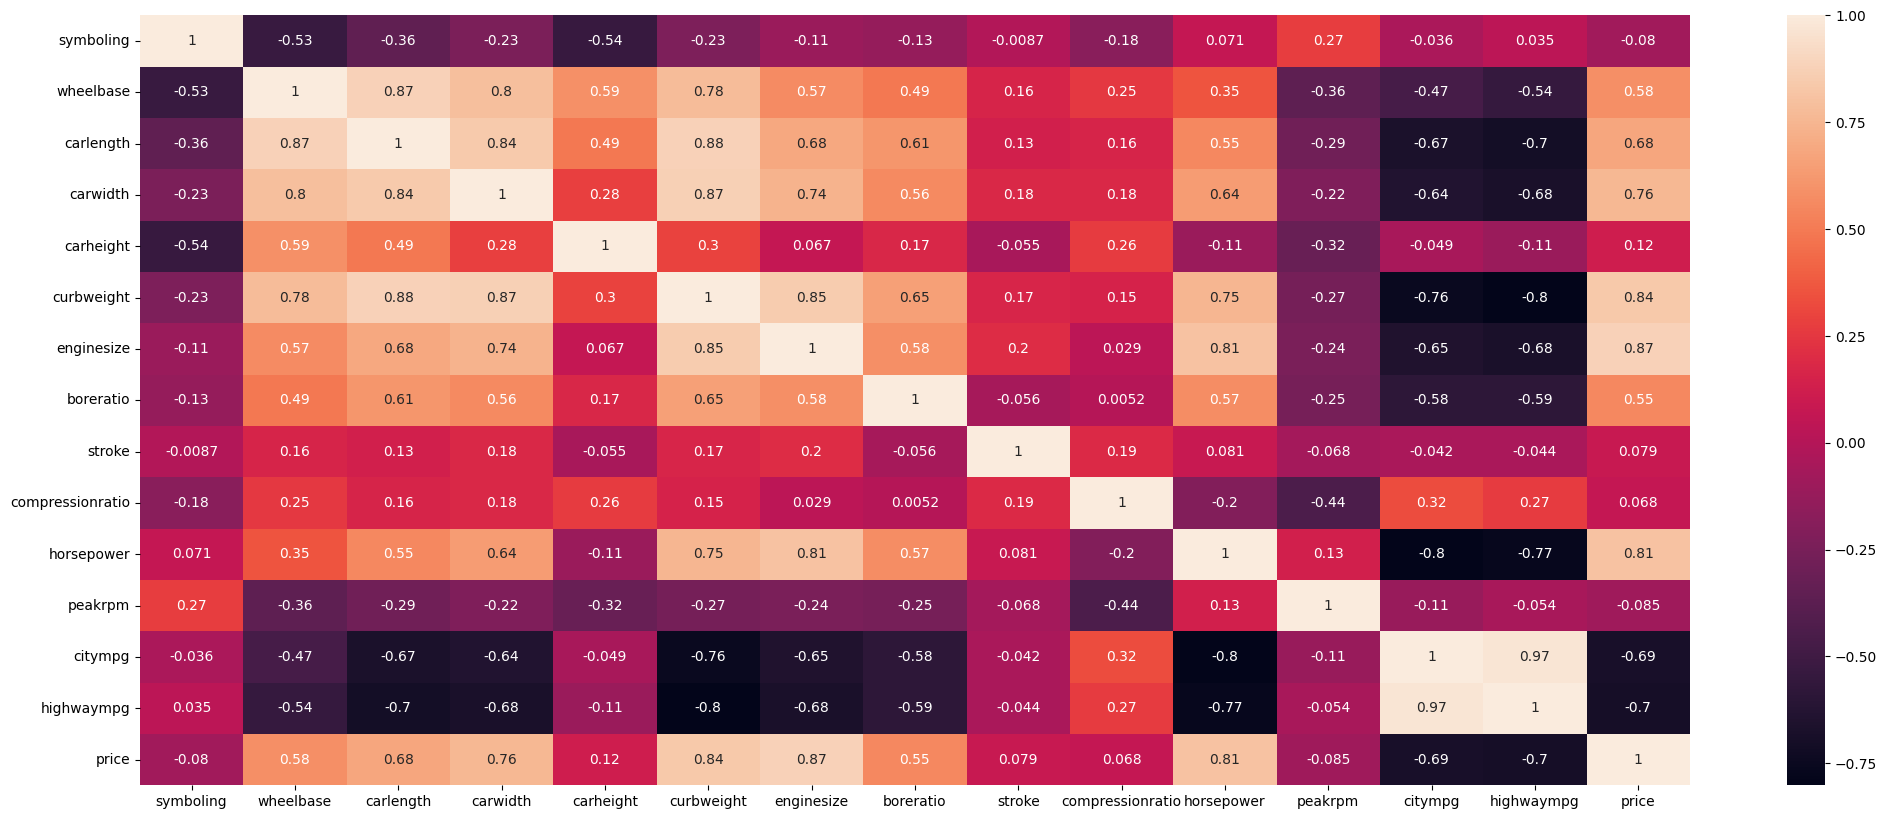

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(num_df.corr(),annot=True)

In [ ]:
df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [ ]:
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

In [ ]:
dict_words= {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}
df['doornumber']= df['doornumber'].map(dict_words)
df['cylindernumber']=df['cylindernumber'].map(dict_words)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
obj_df= df.select_dtypes(include='object')
obj_df

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarCompany
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi
...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,front,ohc,mpfi,volvo
201,gas,turbo,sedan,rwd,front,ohc,mpfi,volvo
202,gas,std,sedan,rwd,front,ohcv,mpfi,volvo
203,diesel,turbo,sedan,rwd,front,ohc,idi,volvo


In [ ]:
# One hot encoding
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
pd.get_dummies(df['carbody'],dtype=int)

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [ ]:
pd.get_dummies(df[['carbody','fueltype','aspiration']],dtype=int,drop_first=True)

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,fueltype_gas,aspiration_turbo
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,1,0,0,1,0
3,0,0,1,0,1,0
4,0,0,1,0,1,0
...,...,...,...,...,...,...
200,0,0,1,0,1,0
201,0,0,1,0,1,1
202,0,0,1,0,1,0
203,0,0,1,0,0,1


In [ ]:
dummy_df= pd.get_dummies(obj_df,dtype=int,drop_first=True)
dummy_df

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
201,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
202,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.drop(columns=obj_df.columns,inplace=True)
df_new= pd.concat([df,dummy_df],axis=1)
df_new

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,0,0,0,0,0,0,0,0,0,1
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,0,0,0,0,0,0,0,0,0,1
202,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,0,0,0,0,0,0,0,0,0,1
203,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,0,0,0,0,0,0,0,0,0,1


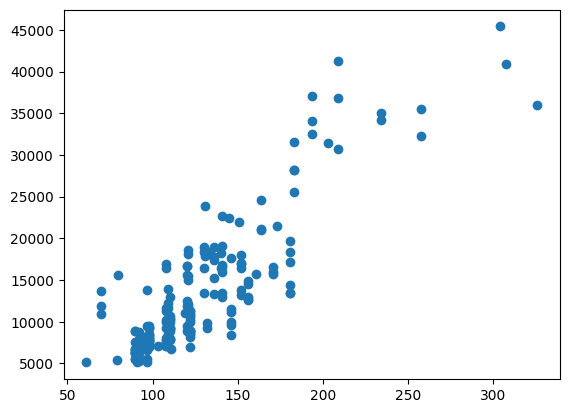

In [ ]:
plt.scatter(df['enginesize'],df['price'])

<Axes: xlabel='enginesize', ylabel='price'>

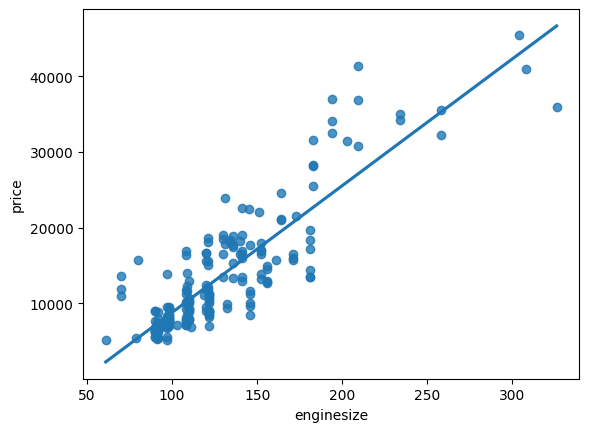

In [ ]:
sns.regplot(x=df['enginesize'],y=df['price'],ci=None)

In [ ]:
a1= np.array([1,2,3,4,5])
a2=np.array([10,11,12,13,14])

aa1,aa2,aa11,aa22=train_test_split(a1,a2,test_size=0.2,random_state=42)
aa1

array([5, 3, 1, 4])

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(df['enginesize'],df['price'],test_size=0.33,random_state=42)

In [ ]:
def errors_product():
  prod = (X_train - X_train.mean()) * (y_train - y_train.mean())
  return prod

def squared_errors():
  sq_errors = (X_train - X_train.mean()) ** 2
  return sq_errors

slope = errors_product().sum()/ squared_errors().sum()
intercept = y_train.mean() - slope * X_train.mean()

print(f"Slope: {slope} \nIntercept: {intercept}")

Slope: 165.32203370071696 
Intercept: -7590.257181325589


In [ ]:
X_train_reshaped=X_train.values.reshape(-1,1)

lr=LinearRegression()
lr.fit(X_train_reshaped,y_train)
lr.intercept_, lr.coef_

(np.float64(-7590.257181325582), array([165.3220337]))

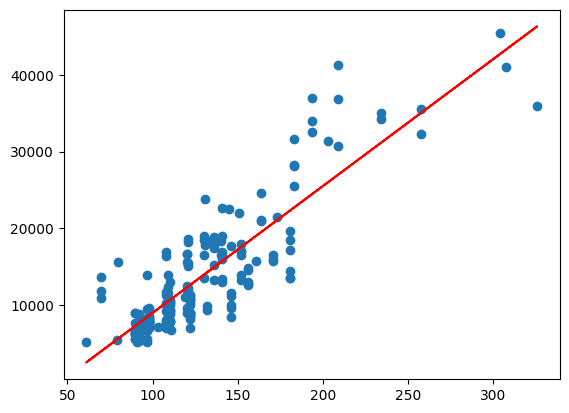

In [ ]:
plt.scatter(df['enginesize'],df['price'])
plt.plot(df['enginesize'],slope*df['enginesize']+intercept,color='red')

In [ ]:
def r_square(x,y):
  y_pred = slope * x + intercept
  sse = ((y - y_pred) **2).sum()
  sst = ((y - y.mean()) **2).sum()
  r = 1 - (sse/sst)
  return r

print(r_square(X_train, y_train))
print(r_square(X_test,y_test))

0.7650159366830336
0.7606548315153334


In [ ]:
np.corrcoef(X_train,y_train)[0,1]**2

np.float64(0.7650159366830331)

In [ ]:
np.corrcoef(X_train,y_train)

array([[1.        , 0.87465189],
       [0.87465189, 1.        ]])

In [ ]:
X_test_reshaped=X_test.values.reshape(-1,1)
y_train_pred= lr.predict(X_train_reshaped)
y_test_pred= lr.predict(X_test_reshaped)

print("Train")
print(mean_absolute_error(y_train,y_train_pred))
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_log_error(y_train,y_train_pred))
print()
print('Test')

print(mean_absolute_error(y_test,y_test_pred))
print(mean_squared_error(y_test,y_test_pred))
print(mean_squared_log_error(y_test,y_test_pred))


Train
2906.3830116569407
14675971.645771094
0.07982374537928014

Test
2773.9908161019634
15661604.54844862
0.09333552536979671
